In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

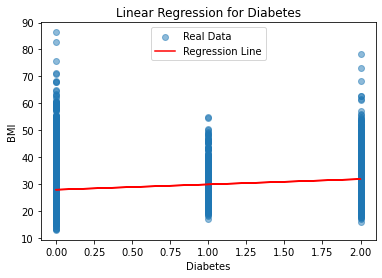

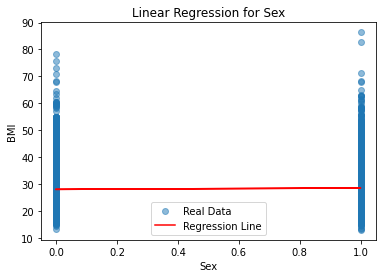

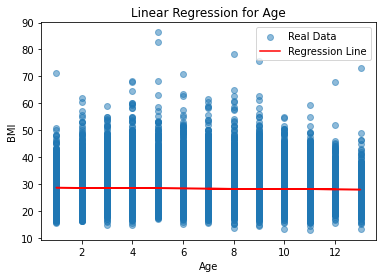

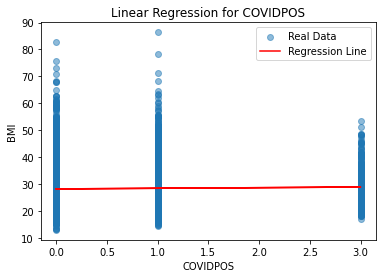

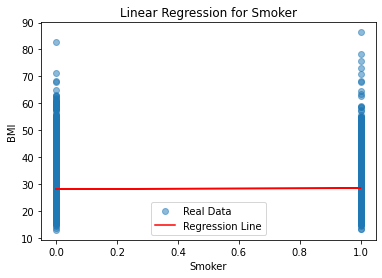

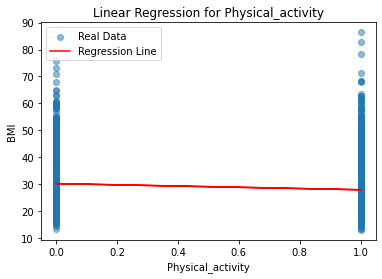

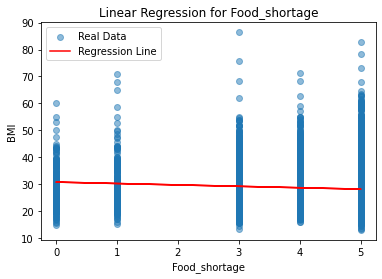

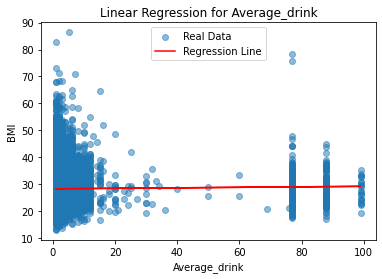

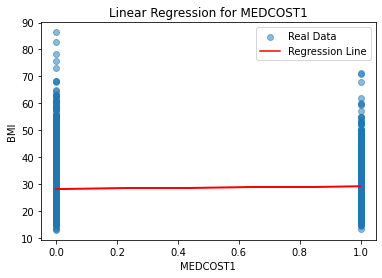

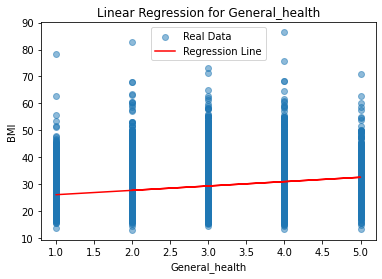

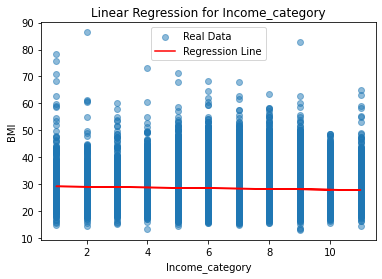

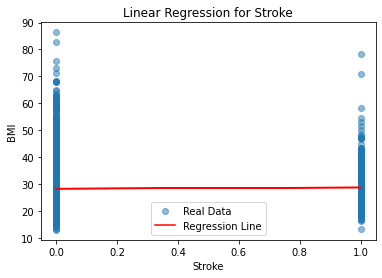

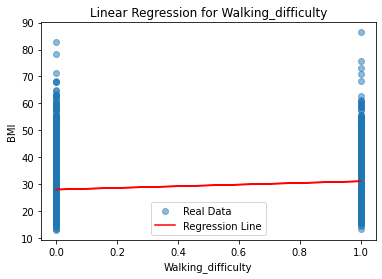

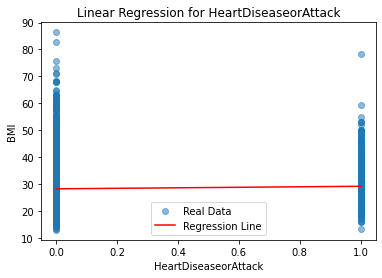

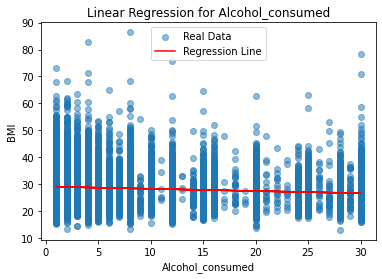

Feature: Diabetes
Intercept: 27.93566874441423
Coefficient: 1.9621603731462889
Residuals: 62317    -2.425669
93046    -6.625669
86085     7.574331
23841    -2.515669
84876    -2.245669
            ...   
81158     4.074331
13379    -2.835669
71580    -2.875669
100018    7.494331
10206    -2.325669
Name: BMI, Length: 20790, dtype: float64
Correlation: 0.18439255936317128
Mean Squared Error: 35.893649754511344

Feature: Sex
Intercept: 28.055197243711255
Coefficient: 0.5092616307476253
Residuals: 62317    -2.545197
93046    -6.745197
86085     7.454803
23841    -3.144459
84876    -2.365197
            ...   
81158     3.954803
13379    -3.464459
71580    -2.995197
100018    7.374803
10206    -2.445197
Name: BMI, Length: 20790, dtype: float64
Correlation: 0.04640383395793889
Mean Squared Error: 37.07668692080048

Feature: Age
Intercept: 28.762378816400187
Coefficient: -0.05994628825356501
Residuals: 62317    -2.533023
93046    -6.912862
86085     7.407030
23841    -2.802862
84876    -2.712

In [29]:
X = data[['Diabetes', 'Sex', 'Age', 'COVIDPOS', 'Smoker', 'Physical_activity', 'Food_shortage', 'Average_drink', 'MEDCOST1', 'General_health', 'Income_category', 'Stroke', 'Walking_difficulty', 'HeartDiseaseorAttack', 'Alcohol_consumed']]
y = data['BMI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty dictionary to store regression results
regression_results = {}

# Iterate through each independent variable and compute linear regression
for feature in X.columns:
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(X_train[[feature]], y_train)
    
    # Get the intercept and coefficient for the feature
    intercept = model.intercept_
    coefficient = model.coef_[0]
    
    # Predict using the test data
    y_pred = model.predict(X_test[[feature]])
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Calculate the correlation between predicted and real values
    correlation = np.corrcoef(y_test, y_pred)[0, 1]
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    
    
    # Store the results in the dictionary
    regression_results[feature] = {
        'Intercept': intercept,
        'Coefficient': coefficient,
        'Residuals': residuals,
        'Correlation': correlation,
        'MSE': mse
    }
    
    # Plot the regression line
    plt.scatter(X_test[feature], y_test, label='Real Data', alpha=0.5)
    plt.plot(X_test[feature], y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression for {feature}')
    plt.xlabel(feature)
    plt.ylabel('BMI')
    plt.legend()
    plt.show()
    
    
    


# Print the results for all features
for feature, results in regression_results.items():
    print(f"Feature: {feature}")
    print(f"Intercept: {results['Intercept']}")
    print(f"Coefficient: {results['Coefficient']}")
    print(f"Residuals: {results['Residuals']}")
    print(f"Correlation: {results['Correlation']}")
    print(f"Mean Squared Error: {results['MSE']}")
    print("")

In [ ]:
#Confidence and prediction bands

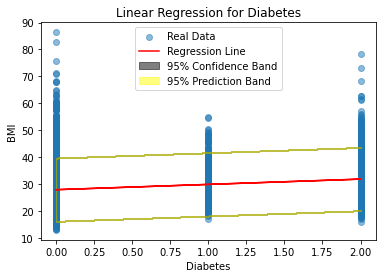

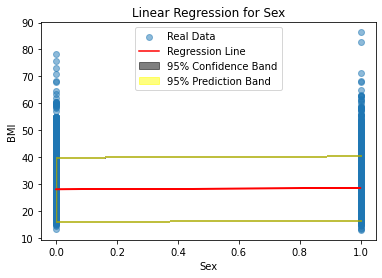

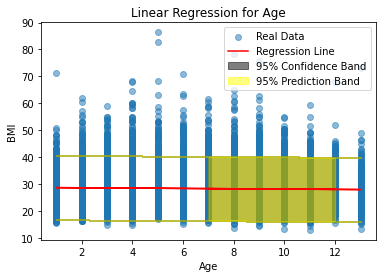

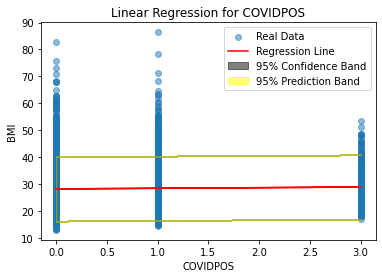

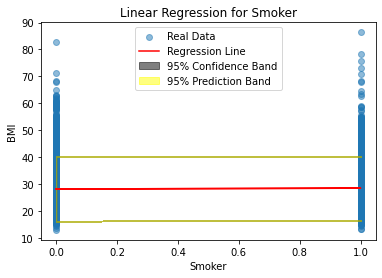

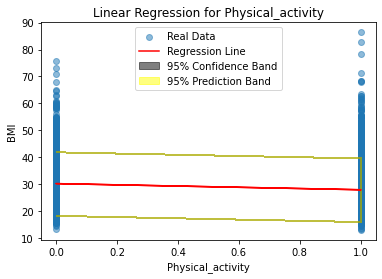

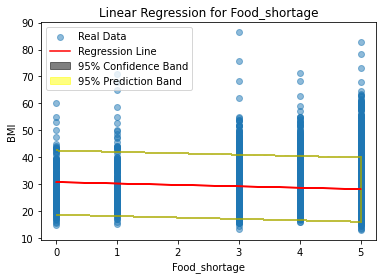

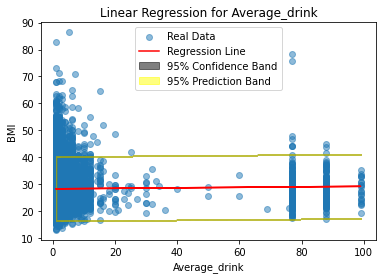

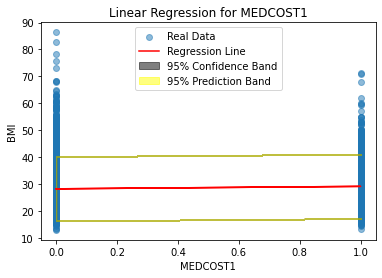

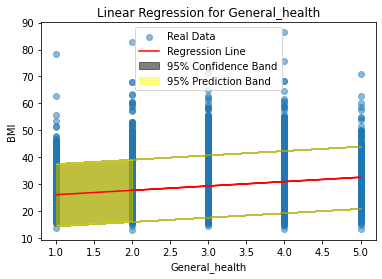

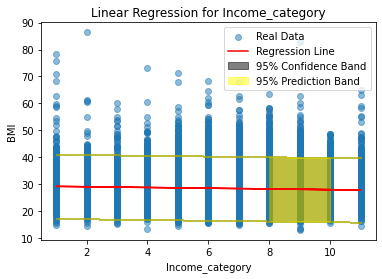

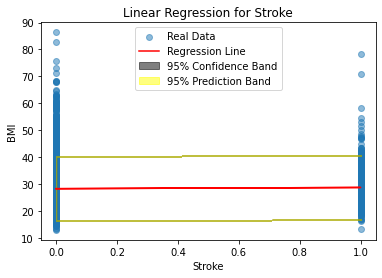

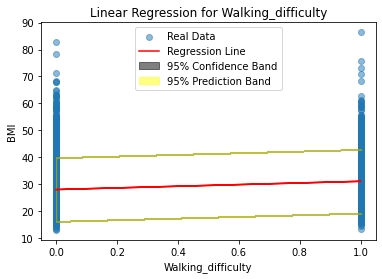

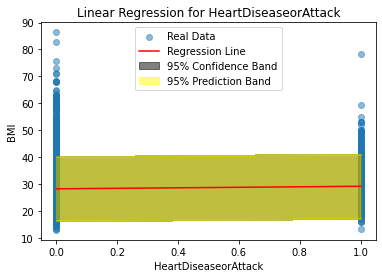

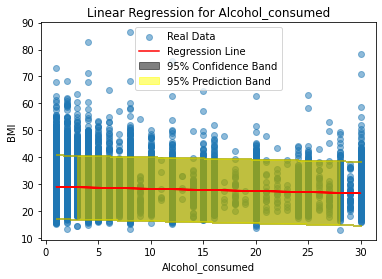

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Diabetes', 'Sex', 'Age', 'COVIDPOS', 'Smoker', 'Physical_activity', 'Food_shortage', 'Average_drink', 'MEDCOST1', 'General_health', 'Income_category', 'Stroke', 'Walking_difficulty', 'HeartDiseaseorAttack', 'Alcohol_consumed']]
y = data['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through each independent variable and compute linear regression
for feature in X.columns:
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(X_train[[feature]], y_train)
    
    # Get the intercept and coefficient for the feature
    intercept = model.intercept_
    coefficient = model.coef_[0]
    
    # Predict using the test data
    y_pred = model.predict(X_test[[feature]])
    
    # Calculate residuals
    residuals = y_test - y_pred

    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    
    
    
    # Calculate confidence and prediction bands
    # Assuming you want 95% confidence and prediction bands
    conf_int = 1.96 * np.std(residuals)
    pred_int = 1.96 * np.sqrt(mse)
    
    # Plot the regression line with confidence and prediction bands
    plt.scatter(X_test[feature], y_test, label='Real Data', alpha=0.5)
    plt.plot(X_test[feature], y_pred, color='red', label='Regression Line')
    plt.fill_between(X_test[feature], y_pred - conf_int, y_pred + conf_int, color='black', alpha=0.5, label='95% Confidence Band')
    plt.fill_between(X_test[feature], y_pred - pred_int, y_pred + pred_int, color='yellow', alpha=0.5, label='95% Prediction Band')
    plt.title(f'Linear Regression for {feature}')
    plt.xlabel(feature)
    plt.ylabel('BMI')
    plt.legend()
    plt.show()

In [ ]:
#Multivariate Linear Regression 

In [52]:
#With most predictive values 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

X = data[['Diabetes', 'Physical_activity','General_health', 'Alcohol_consumed','Walking_difficulty']]  
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

correlation = np.corrcoef(Y_test, Y_pred)[0, 1]

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error (MSE):", mse)
print("correlation:", correlation)
print("R-squared (R2):", r2)

Coefficients: [ 1.25615569 -1.10528884  1.21326507 -0.07322456  0.93153141]
Intercept: 26.746423569214436
Mean Squared Error (MSE): 33.38378824015716
correlation: 0.3186437628608678
R-squared (R2): 0.10150940838606604


In [53]:
# Bad/Unhealthy lifestyle affecting BMI
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

X = data[['Alcohol_consumed', 'Average_drink','Smoker', 'Physical_activity']]  
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, Y_pred)[0, 1]

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("correlation:", correlation)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficients: [-0.08474693  0.00656187  0.33732934 -2.21267501]
Intercept: 30.83522111358377
correlation: 0.20267257816205891
Mean Squared Error (MSE): 35.63640478632683
R-squared (R2): 0.04088253288927257


In [54]:
#For demographic factors affecting BMI
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Age', 'Sex','Income_category']]  
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, Y_pred)[0, 1]

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("correlation:", correlation)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficients: [-0.06474681  0.54991682 -0.14801778]
Intercept: 29.614991068652603
correlation: 0.0835155426768014
Mean Squared Error (MSE): 36.89854368978688
R-squared (R2): 0.006913352342390433


In [55]:
#For health issues affecting BMI
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

X = data[['Diabetes', 'COVIDPOS','General_health','Walking_difficulty','Stroke','HeartDiseaseorAttack']]  
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, Y_pred)[0, 1]

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("correlation:", correlation)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficients: [ 1.41152153  0.2906196   1.34308394  1.26538354 -1.05815054 -0.69192873]
Intercept: 24.68976828290689
correlation: 0.29469473492035003
Mean Squared Error (MSE): 33.92965548497214
R-squared (R2): 0.08681794856106895


In [ ]:
#Regularisation

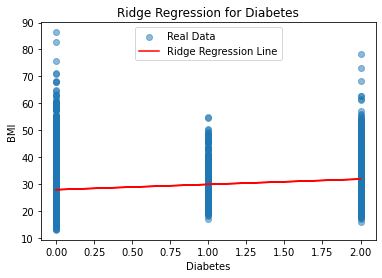

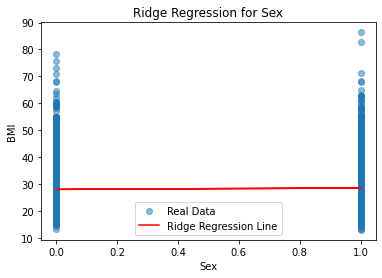

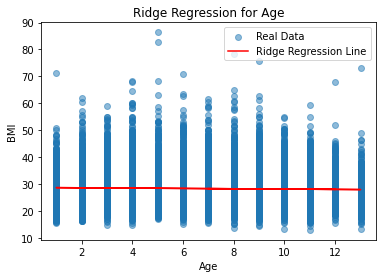

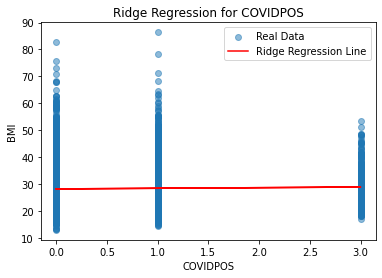

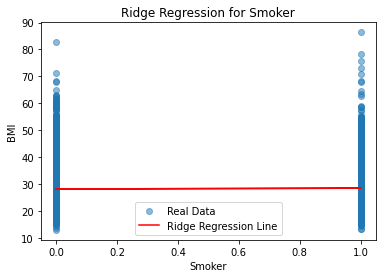

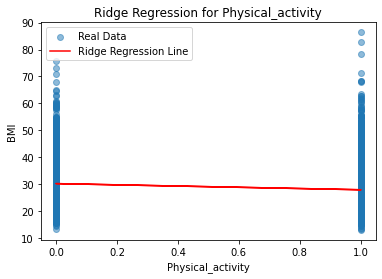

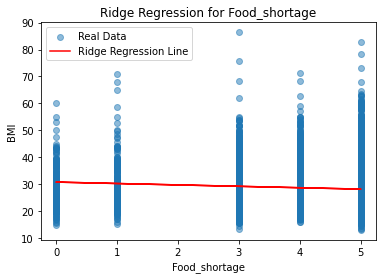

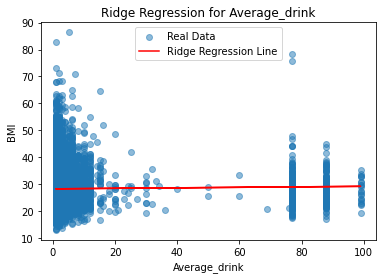

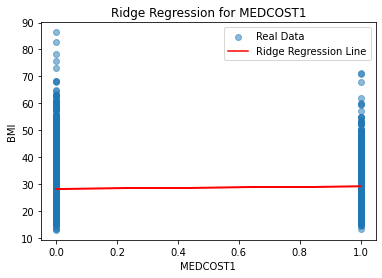

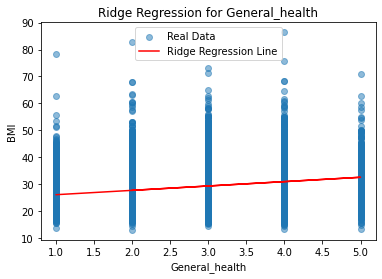

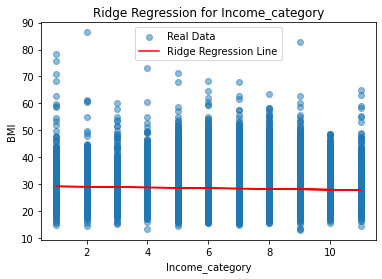

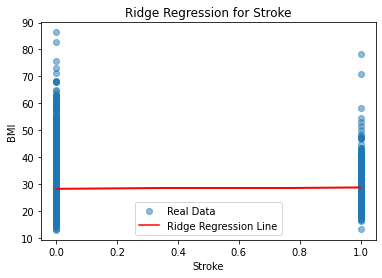

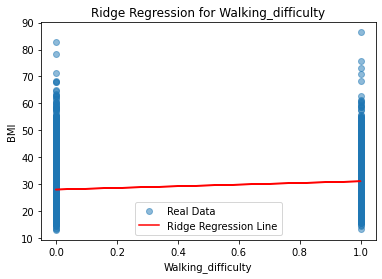

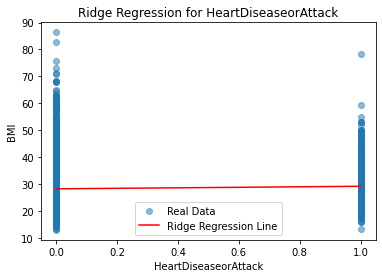

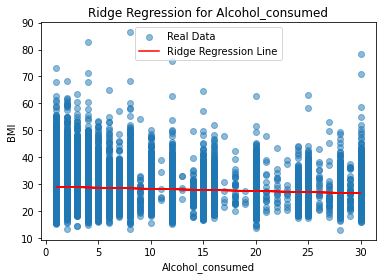

Feature: Diabetes
Intercept: 27.935682561744063
Coefficient: 1.9620908063162543
Correlation: 0.18439255936317223
Mean Squared Error: 35.893647580158074

Feature: Sex
Intercept: 28.055210288361195
Coefficient: 0.5092370442685219
Correlation: 0.04640383395793882
Mean Squared Error: 37.07668762555251

Feature: Age
Intercept: 28.762378366527656
Coefficient: -0.05994622653959029
Correlation: 0.026669561475543363
Mean Squared Error: 37.131364424535015

Feature: COVIDPOS
Intercept: 28.224935111842157
Coefficient: 0.23086002968877933
Correlation: 0.027983716472714183
Mean Squared Error: 37.12679230683879

Feature: Smoker
Intercept: 28.209872426152256
Coefficient: 0.2763187859864473
Correlation: 0.031703104012059016
Mean Squared Error: 37.1217801199627

Feature: Physical_activity
Intercept: 30.230204103322393
Coefficient: -2.2823546968889934
Correlation: 0.156510331341335
Mean Squared Error: 36.257541540375044

Feature: Food_shortage
Intercept: 30.787942587369628
Coefficient: -0.521135286452098

In [21]:
#Regularisation of part A
# Load your dataset
from sklearn.linear_model import Ridge
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

X = data[['Diabetes', 'Sex', 'Age', 'COVIDPOS', 'Smoker', 'Physical_activity', 'Food_shortage', 'Average_drink', 'MEDCOST1', 'General_health', 'Income_category', 'Stroke', 'Walking_difficulty', 'HeartDiseaseorAttack', 'Alcohol_consumed']]
y = data['BMI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty dictionary to store regression results
regression_results = {}

# Set the alpha parameter for Ridge regression 
alpha = 1.0

# Iterate through each independent variable and compute Ridge regression
for feature in X.columns:
    # Create a Ridge regression model
    model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    model.fit(X_train[[feature]], y_train)
    
    # Get the intercept and coefficient for the feature
    intercept = model.intercept_
    coefficient = model.coef_[0]
    
    # Predict using the test data
    y_pred = model.predict(X_test[[feature]])
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Calculate the correlation between predicted and real values
    correlation = np.corrcoef(y_test, y_pred)[0, 1]
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results in the dictionary
    regression_results[feature] = {
        'Intercept': intercept,
        'Coefficient': coefficient,
        'Residuals': residuals,
        'Correlation': correlation,
        'MSE': mse
    }
    
    # Plot the regression line
    plt.scatter(X_test[feature], y_test, label='Real Data', alpha=0.5)
    plt.plot(X_test[feature], y_pred, color='red', label='Ridge Regression Line')
    plt.title(f'Ridge Regression for {feature}')
    plt.xlabel(feature)
    plt.ylabel('BMI')
    plt.legend()
    plt.show()

# Print the results for all features
for feature, results in regression_results.items():
    print(f"Feature: {feature}")
    print(f"Intercept: {results['Intercept']}")
    print(f"Coefficient: {results['Coefficient']}")
    print(f"Correlation: {results['Correlation']}")
    print(f"Mean Squared Error: {results['MSE']}")
    print("")


In [ ]:
#Regularisation for part B

In [57]:
# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Diabetes', 'Physical_activity','General_health', 'Alcohol_consumed','Walking_difficulty']]
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Ridge Regression model with regularization
alpha = 5.0  
model = Ridge(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)

correlation = np.corrcoef(y_test, y_pred)[0, 1]
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("correlation:", correlation)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficients: [ 1.25612261 -1.1052135   1.21327196 -0.07322468  0.93143136]
Intercept: 26.746361924107628
correlation: 0.12674577668517534
Mean Squared Error (MSE): 33.383791617621384
R-squared (R2): 0.10150931748506309


In [58]:
# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Alcohol_consumed', 'Average_drink', 'Smoker', 'Physical_activity']]
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Ridge Regression model with regularization
alpha = 5.0  
model = Ridge(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)
correlation = np.corrcoef(y_test, y_pred)[0, 1]
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("correlation:", correlation)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficients: [-0.08474697  0.00656216  0.3373274  -2.21248226]
Intercept: 30.835060502273475
correlation: 0.12674577668517534
Mean Squared Error (MSE): 35.636419366785034
R-squared (R2): 0.04088214047111971


In [59]:
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Age', 'Sex','Income_category']]
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Ridge Regression model with regularization 
alpha = 5.0  
model = Ridge(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("correlation:", correlation)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Coefficients: [-0.06474673  0.54989007 -0.14801706]
Intercept: 29.614999282746
correlation: 0.12674577668517534
Mean Squared Error (MSE): 36.898544754863046
R-squared (R2): 0.006913323676952299


In [60]:
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Diabetes', 'COVIDPOS','General_health','Walking_difficulty','Stroke','HeartDiseaseorAttack']]
Y = data['BMI']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Ridge Regression model with regularization 
alpha = 5.0  
model = Ridge(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the testing data
Y_pred = model.predict(X_test)
correlation = np.corrcoef(y_test, y_pred)[0, 1]
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print coefficients, MSE, and R-squared
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("correlation:", correlation)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Coefficients: [ 1.41147085  0.29061315  1.34307808  1.26517646 -1.05765363 -0.69178849]
Intercept: 24.689791822164963
correlation: 0.12674577668517534
Mean Squared Error (MSE): 33.92965416803534
R-squared (R2): 0.0868179840050789


In [65]:
#Multiple Runs for part A

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Diabetes', 'Sex', 'Age', 'COVIDPOS', 'Smoker', 'Physical_activity', 'Food_shortage', 'Average_drink', 'MEDCOST1', 'General_health', 'Income_category', 'Stroke', 'Walking_difficulty', 'HeartDiseaseorAttack', 'Alcohol_consumed']]
y = data['BMI']

# Set the number of runs
num_runs = 5  

# Create lists to store results for each run
coefficients_list = []
mse_list = []

# Set the alpha parameter for Ridge regression
alpha = 5.0

for run in range(num_runs):
    # Split the dataset into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=run * 42)  
    
    # Create an empty dictionary to store regression results
    regression_results = {}

    for feature in X.columns:
        # Create a Ridge regression model
        model = Ridge(alpha=alpha)
    
        # Fit the model to the training data
        model.fit(X_train[[feature]], y_train)
    
        # Get the intercept and coefficient for the feature
        intercept = model.intercept_
        coefficient = model.coef_[0]
    
        # Predict using the test data
        y_pred = model.predict(X_test[[feature]])
        
        correlation = np.corrcoef(y_test, y_pred)[0, 1]
    
        # Calculate mean squared error
        mse = mean_squared_error(y_test, y_pred)
    
        # Store the results in the dictionary
        regression_results[feature] = {
            'Intercept': intercept,
            'Coefficient': coefficient,
            'correlation':correlation,
            'MSE': mse
        }
    
    # Append the results to the lists
    coefficients_list.append(regression_results)
    mse_list.append({feature: results['MSE'] for feature, results in regression_results.items()})

# Print the results for all features across multiple runs
for run in range(num_runs):
    print(f"Results for Run {run + 1}:")
    for feature, results in coefficients_list[run].items():
        print(f"Feature: {feature}")
        print(f"Intercept: {results['Intercept']}")
        print(f":correlation {results['correlation']}")
        print(f"Coefficient {results['Coefficient']}")
        print(f"Mean Squared Error: {results['MSE']}")
        print("")

Results for Run 1:
Feature: Diabetes
Intercept: 27.911484014691556
:correlation 0.17738374981161179
Coefficient 1.9729047083492528
Mean Squared Error: 35.93493271427402

Feature: Sex
Intercept: 28.017073392959567
:correlation 0.03460747473382085
Coefficient 0.5454997103702882
Mean Squared Error: 37.05673821145719

Feature: Age
Intercept: 28.72518395308528
:correlation 0.03220539009278519
Coefficient -0.057456885353926096
Mean Squared Error: 37.05870207560946

Feature: COVIDPOS
Intercept: 28.196267929502227
:correlation 0.01721030108774518
Coefficient 0.25407211766157795
Mean Squared Error: 37.092191802478716

Feature: Smoker
Intercept: 28.181484224456486
:correlation 0.024036906666014615
Coefficient 0.2999698345176209
Mean Squared Error: 37.07564967027457

Feature: Physical_activity
Intercept: 30.23281163673219
:correlation 0.14946617128532752
Coefficient -2.3094130956186194
Mean Squared Error: 36.273680171440915

Feature: Food_shortage
Intercept: 30.640821871049614
:correlation 0.0667

In [69]:
#Multiple runs for part B
# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Diabetes', 'Physical_activity','General_health', 'Alcohol_consumed','Walking_difficulty']]
Y = data['BMI']

# Set the number of runs
num_runs = 5  # You can adjust the number of runs

# Create lists to store results for each run
coefficients_list = []
mse_list = []
r2_list = []
corr_list=[]

# Set the alpha parameter for Ridge regression 
alpha = 5.0

for run in range(num_runs):
    # Split the dataset into training and testing sets with different random states
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=run * 42)  # Adjust random state
    
    # Create a Ridge Regression model with regularization
    model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    model.fit(X_train, Y_train)

    # Get the model coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    # Make predictions on the testing data
    Y_pred = model.predict(X_test)
    
    correlation = np.corrcoef(Y_test, Y_pred)[0, 1]
    

    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Append the results to the lists
    coefficients_list.append(coefficients)
    corr_list.append(correlation)
    mse_list.append(mse)
    r2_list.append(r2)

# Print results across multiple runs
for run in range(num_runs):
    print(f"Results for Run {run + 1}:")
    print("Coefficients:", coefficients_list[run])
    print("correlation:", corr_list[run])
    print("Mean Squared Error (MSE):", mse_list[run])
    print("R-squared (R2):", r2_list[run])
    print("")

Results for Run 1:
Coefficients: [ 1.27059825 -1.12652073  1.21327596 -0.07342256  0.88578973]
correlation: 0.3126672589112663
Mean Squared Error (MSE): 33.47568254361464
R-squared (R2): 0.09749679864810978

Results for Run 2:
Coefficients: [ 1.25612261 -1.1052135   1.21327196 -0.07322468  0.93143136]
correlation: 0.3186435857085497
Mean Squared Error (MSE): 33.383791617621384
R-squared (R2): 0.10150931748506309

Results for Run 3:
Coefficients: [ 1.27610109 -1.15235778  1.19535813 -0.07398075  0.82127209]
correlation: 0.32281849019301234
Mean Squared Error (MSE): 33.49551224564108
R-squared (R2): 0.1038138830170674

Results for Run 4:
Coefficients: [ 1.26313301 -1.15485892  1.21164622 -0.07321199  0.98647067]
correlation: 0.3092646959763688
Mean Squared Error (MSE): 32.39854892544028
R-squared (R2): 0.0953164461708369

Results for Run 5:
Coefficients: [ 1.2453518  -1.12043912  1.20773388 -0.07138465  0.92291617]
correlation: 0.32128764682183997
Mean Squared Error (MSE): 34.17171344799

In [70]:

# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Alcohol_consumed', 'Average_drink', 'Smoker', 'Physical_activity']]
Y = data['BMI']

# Set the number of runs
num_runs = 5  # You can adjust the number of runs

# Create lists to store results for each run
coefficients_list = []
corr_list=[]
mse_list = []
r2_list = []

# Set the alpha parameter for Ridge regression (adjust as needed)
alpha = 5.0

for run in range(num_runs):
    # Split the dataset into training and testing sets with different random states
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=run * 42)  # Adjust random state
    
    # Create a Ridge Regression model with regularization
    model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    model.fit(X_train, Y_train)

    # Get the model coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    # Make predictions on the testing data
    Y_pred = model.predict(X_test)
    
    correlation = np.corrcoef(Y_test, Y_pred)[0, 1]
    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Append the results to the lists
    coefficients_list.append(coefficients)
    corr_list.append(correlation)
    mse_list.append(mse)
    r2_list.append(r2)

# Print results across multiple runs
for run in range(num_runs):
    print(f"Results for Run {run + 1}:")
    print("Coefficients:", coefficients_list[run])
    print("Correlation:", corr_list[run])
    print("Mean Squared Error (MSE):", mse_list[run])
    print("R-squared (R2):", r2_list[run])
    print("")

Results for Run 1:
Coefficients: [-0.0859947   0.00694681  0.35827458 -2.23518292]
Correlation: 0.19222171583522413
Mean Squared Error (MSE): 35.72824638140399
R-squared (R2): 0.036767758330389144

Results for Run 2:
Coefficients: [-0.08474697  0.00656216  0.3373274  -2.21248226]
Correlation: 0.20267215864025243
Mean Squared Error (MSE): 35.636419366785034
R-squared (R2): 0.04088214047111971

Results for Run 3:
Coefficients: [-0.08629257  0.00403208  0.36766899 -2.24307047]
Correlation: 0.1909639878237928
Mean Squared Error (MSE): 36.0224534821531
R-squared (R2): 0.03620453768190368

Results for Run 4:
Coefficients: [-0.08529388  0.00762998  0.33809283 -2.27893856]
Correlation: 0.19069241395518935
Mean Squared Error (MSE): 34.51252555682531
R-squared (R2): 0.03628664529936998

Results for Run 5:
Coefficients: [-0.0839362   0.00566595  0.38573677 -2.22654559]
Correlation: 0.19800784611618047
Mean Squared Error (MSE): 36.61475026310455
R-squared (R2): 0.038912533416206374



In [71]:
# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Age', 'Sex','Income_category']]
Y = data['BMI']

# Set the number of runs
num_runs = 5  # You can adjust the number of runs

# Create lists to store results for each run
coefficients_list = []
corr_list = []
mse_list = []
r2_list = []

# Set the alpha parameter for Ridge regression 
alpha = 5.0

for run in range(num_runs):
    # Split the dataset into training and testing sets with different random states
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=run * 42)  # Adjust random state
    
    # Create a Ridge Regression model with regularization
    model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    model.fit(X_train, Y_train)

    # Get the model coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    # Make predictions on the testing data
    Y_pred = model.predict(X_test)
    correlation = np.corrcoef(Y_test, Y_pred)[0, 1]

    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Append the results to the lists
    coefficients_list.append(coefficients)
    corr_list.append(correlation)
    mse_list.append(mse)
    r2_list.append(r2)

# Print results across multiple runs
for run in range(num_runs):
    print(f"Results for Run {run + 1}:")
    print("Coefficients:", coefficients_list[run])
    print("Correlation:", corr_list[run])
    print("Mean Squared Error (MSE):", mse_list[run])
    print("R-squared (R2):", r2_list[run])
    print("")

Results for Run 1:
Coefficients: [-0.06234084  0.58914967 -0.15491093]
Correlation: 0.07226486407111478
Mean Squared Error (MSE): 36.906358913532834
R-squared (R2): 0.0050058866967404025

Results for Run 2:
Coefficients: [-0.06474673  0.54989007 -0.14801706]
Correlation: 0.08351547637341097
Mean Squared Error (MSE): 36.898544754863046
R-squared (R2): 0.006913323676952299

Results for Run 3:
Coefficients: [-0.05969545  0.56101649 -0.1480292 ]
Correlation: 0.08631557618897058
Mean Squared Error (MSE): 37.109341818137665
R-squared (R2): 0.007124396131095945

Results for Run 4:
Coefficients: [-0.06363051  0.58228779 -0.15435356]
Correlation: 0.07337791228555685
Mean Squared Error (MSE): 35.623007455029544
R-squared (R2): 0.00527801239910175

Results for Run 5:
Coefficients: [-0.05830225  0.57458787 -0.15059385]
Correlation: 0.08113278176552752
Mean Squared Error (MSE): 37.856283992289185
R-squared (R2): 0.006323959197177431



In [72]:
# Load your dataset
data = pd.read_csv("C:/Users/Sakshi/Downloads/filtered_data.csv")

# Define the independent variables (features) and the dependent variable
X = data[['Diabetes', 'COVIDPOS','General_health','Walking_difficulty','Stroke','HeartDiseaseorAttack']]
Y = data['BMI']

# Set the number of runs
num_runs = 5  # You can adjust the number of runs

# Create lists to store results for each run
coefficients_list = []
corr_list = []
mse_list = []
r2_list = []

# Set the alpha parameter for Ridge regression 
alpha = 5.0

for run in range(num_runs):
    # Split the dataset into training and testing sets with different random states
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=run * 42)  # Adjust random state
    
    # Create a Ridge Regression model with regularization
    model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    model.fit(X_train, Y_train)

    # Get the model coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    # Make predictions on the testing data
    Y_pred = model.predict(X_test)
    
    correlation = np.corrcoef(Y_test, Y_pred)[0, 1]

    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Append the results to the lists
    coefficients_list.append(coefficients)
    corr_list.append(correlation)
    mse_list.append(mse)
    r2_list.append(r2)

# Print results across multiple runs
for run in range(num_runs):
    print(f"Results for Run {run + 1}:")
    print("Coefficients:", coefficients_list[run])
    print("Correlation:", corr_list[run])
    print("Mean Squared Error (MSE):", mse_list[run])
    print("R-squared (R2):", r2_list[run])
    print("")


Results for Run 1:
Coefficients: [ 1.42519059  0.31677901  1.34824187  1.23184661 -1.08846697 -0.66436081]
Correlation: 0.288002941029691
Mean Squared Error (MSE): 34.026138557916475
R-squared (R2): 0.08265652423507697

Results for Run 2:
Coefficients: [ 1.41147085  0.29061315  1.34307808  1.26517646 -1.05765363 -0.69178849]
Correlation: 0.29469472513794115
Mean Squared Error (MSE): 33.92965416803534
R-squared (R2): 0.0868179840050789

Results for Run 3:
Coefficients: [ 1.43626029  0.29288586  1.33151431  1.1696867  -1.07367703 -0.71050908]
Correlation: 0.302150350153402
Mean Squared Error (MSE): 33.978482432388816
R-squared (R2): 0.09089181832058557

Results for Run 4:
Coefficients: [ 1.42192371  0.3250012   1.34534363  1.32554115 -1.06091645 -0.64503413]
Correlation: 0.2846082286819056
Mean Squared Error (MSE): 32.926082605080246
R-squared (R2): 0.08058581594540382

Results for Run 5:
Coefficients: [ 1.39897219  0.27959358  1.34011399  1.25406262 -1.07755562 -0.63650056]
Correlation: